### Pair V
# Decision Tree

In [27]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y métricas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Set2", 20)

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------
pd.options.display.max_columns = None

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :
- Ajustad un modelo de Decision Tree a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [28]:
df = pd.read_pickle("../data/metricas_sin_estand_con_outliers.pkl")
df.sample(2)

,satisfaccion,genero,cliente,edad,viaje,clase,distancia,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,retraso_salida
115205,1,0,0,51,1,1,776,1,1,1,1,5,5,5,5,5,5,5,4,5,5,7
42950,0,0,1,37,1,2,1421,1,1,1,4,1,1,1,1,2,4,3,3,3,1,0


In [29]:
X1 = df.drop("satisfaccion", axis = 1)
y1 = df["satisfaccion"]

1º Dcision Tree

In [30]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [31]:
arbol = DecisionTreeClassifier(random_state =0)

In [32]:
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

Podríamos representar el árbol con plot_tree(), para visualizar su estructura sin limitar los hiperparámetros pero podríamos tener malas predicciones debido, por ejemplo, a overfitting. Lo haremos más adelante una vez seleccionados los hiperparámetros.

In [33]:
#fig = plt.figure(figsize = (10,6))
#tree.plot_tree(arbol, feature_names = list(x_train1.columns), filled = True)
#plt.show()

In [34]:
max_features = np.sqrt(len(x_train1.columns))
max_features

4.58257569495584

In [35]:
print(arbol.tree_.max_depth)

39


In [36]:
y_pred_test_sin_esta = arbol.predict(x_test1)
y_pred_train_sin_esta = arbol.predict(x_train1)

In [37]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
   
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [38]:
dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.938405,0.944744,0.943291,0.944017,0.875559,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I


2º Comprobación:

In [39]:
param = {"max_depth": [38, 39, 40], 
        "max_features": [4, 5, 6], 
        "min_samples_split": [10, 40, 55],
        "min_samples_leaf": [10, 40, 55]} 

In [40]:
gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), 
            param_grid= param,
            cv=10, 
            verbose=1) 

In [41]:
gs.fit(x_train1, y_train1)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [38, 39, 40], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [10, 40, 55],
                         'min_samples_split': [10, 40, 55]},
             verbose=1)

In [42]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=38, max_features=6, min_samples_leaf=10,
                       min_samples_split=55, random_state=42)

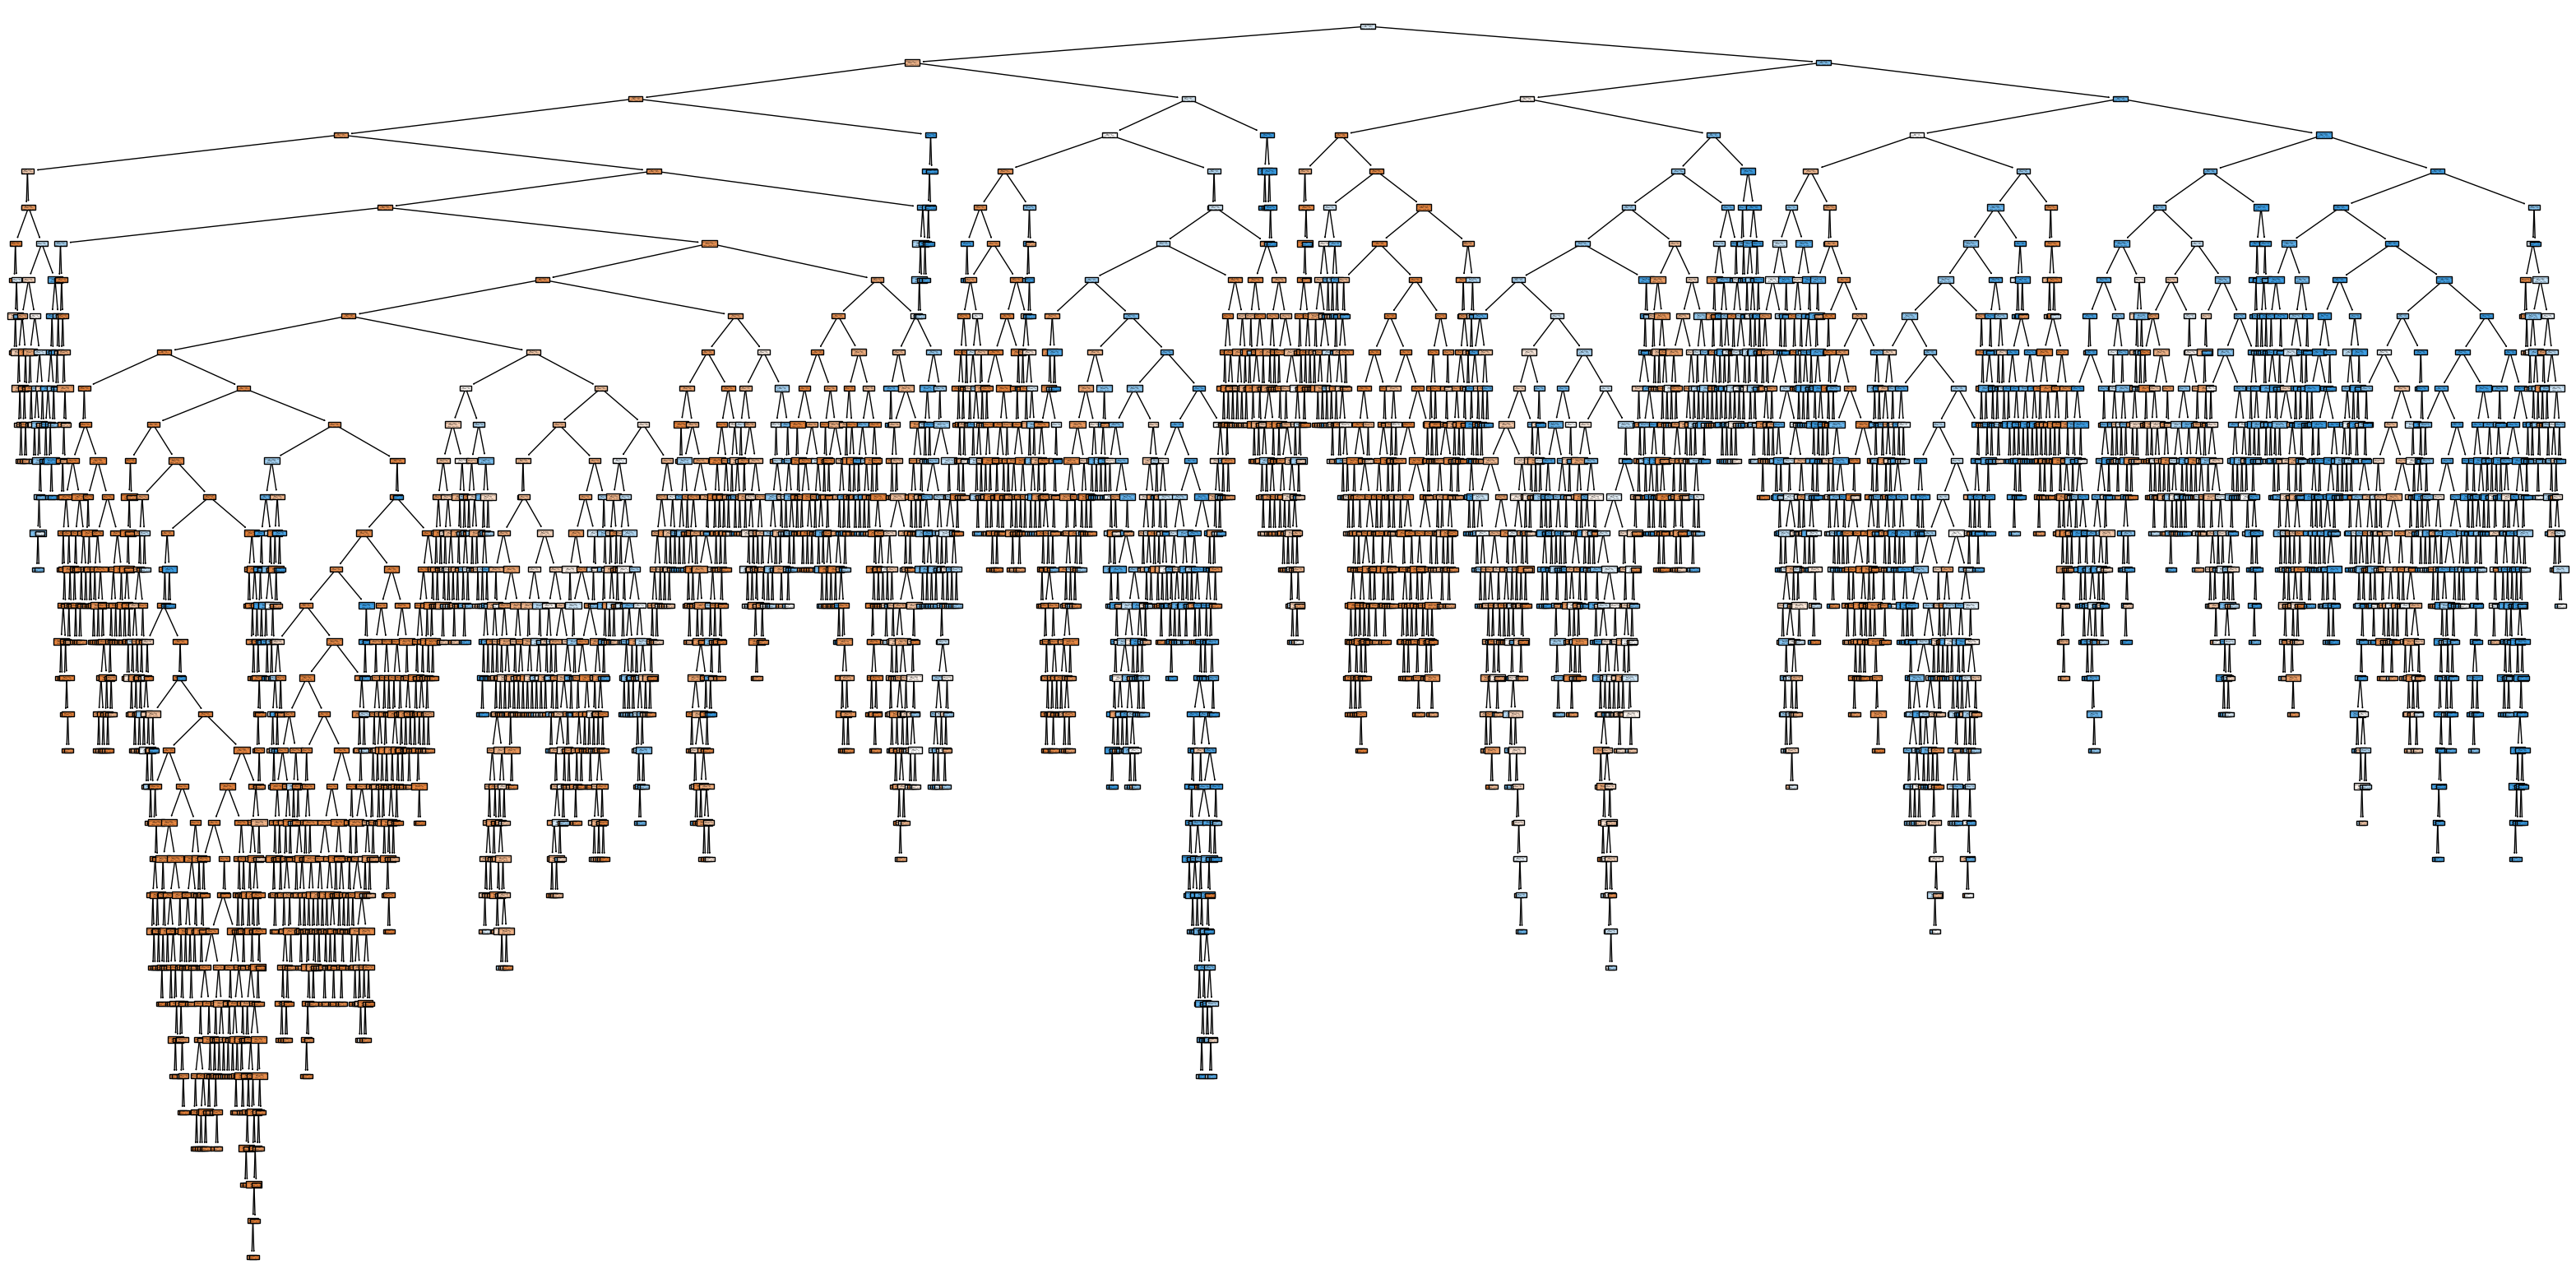

In [17]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=list(x_train1.columns), filled=True);

In [43]:
y_pred_test_sin_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_sin_esta2 = mejor_modelo.predict(x_train1)

In [44]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.933670,0.944767,0.93413,0.939418,0.866139,test,Decision tree Esta II
1,0.941687,0.952718,0.93995,0.946291,0.882516,train,Decision tree Esta II


In [45]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.938405,0.944744,0.943291,0.944017,0.875559,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.933670,0.944767,0.934130,0.939418,0.866139,test,Decision tree Esta II
1,0.941687,0.952718,0.939950,0.946291,0.882516,train,Decision tree Esta II


In [46]:
param = {"max_depth": [37], 
        "max_features": [6],
        "min_samples_split": [10],
        "min_samples_leaf": [10]} 

In [47]:
gs = GridSearchCV(
            estimator=DecisionTreeClassifier(), 
            param_grid= param, 
            cv=10, 
            verbose=1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [48]:
gs.fit(x_train1, y_train1)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [37], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [10]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [49]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=37, max_features=6, min_samples_leaf=10,
                       min_samples_split=10)

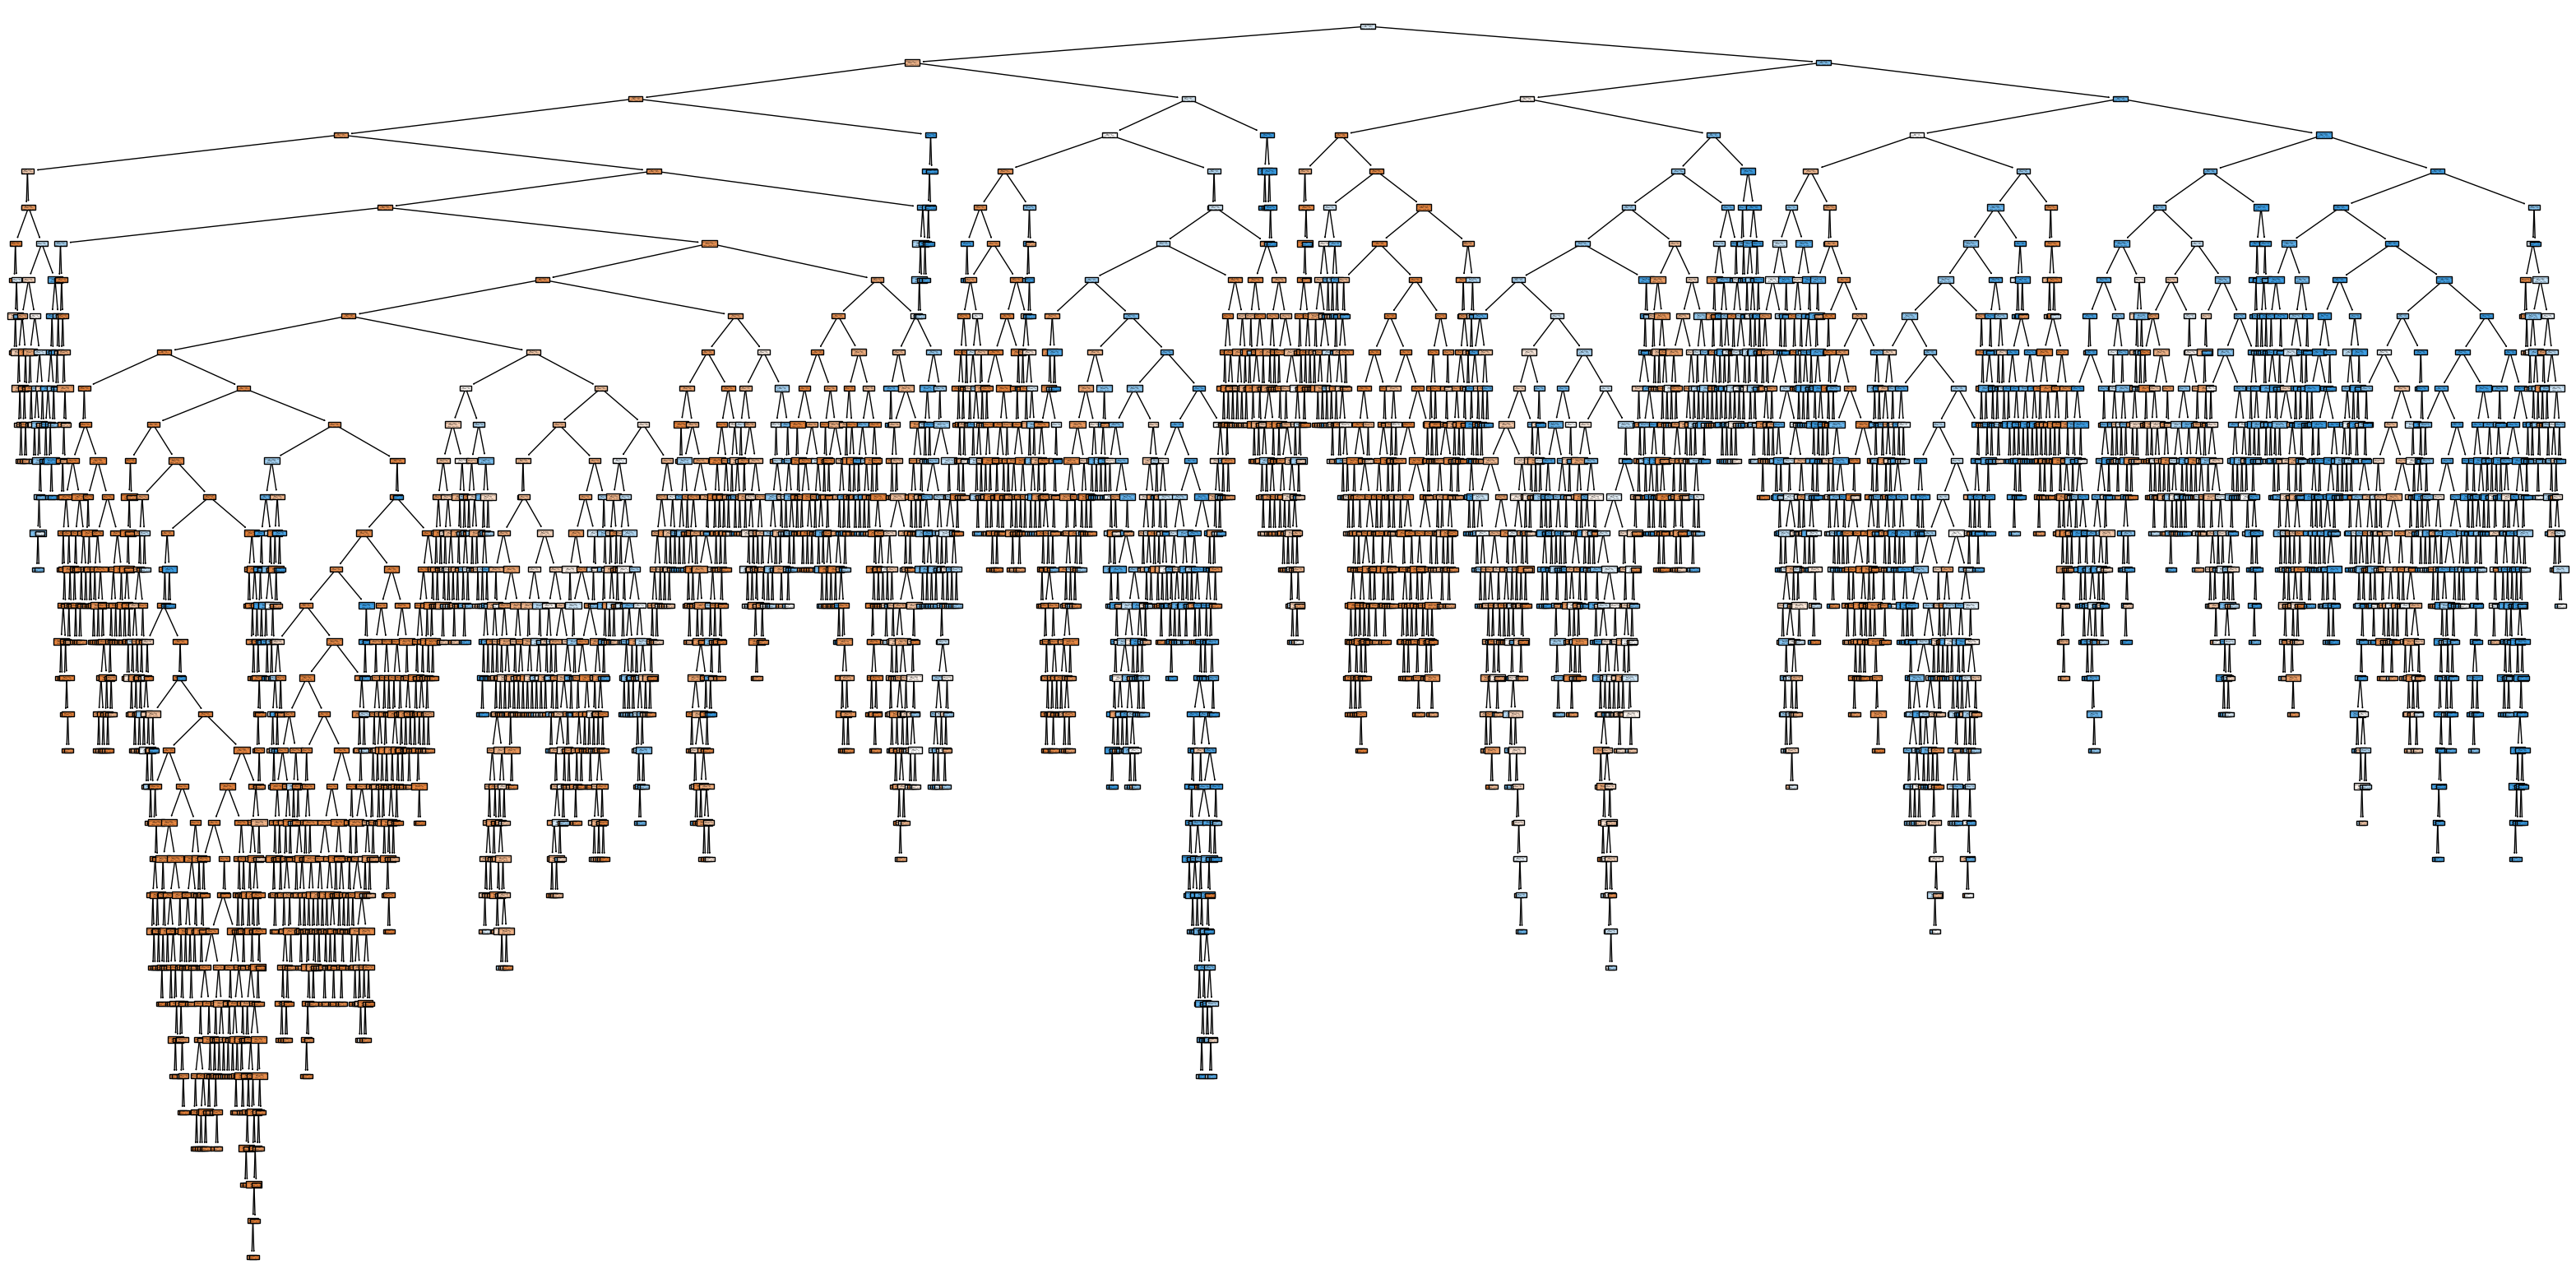

In [24]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=list(x_train1.columns), filled=True);

In [51]:
y_pred_sin_test_esta3 = mejor_modelo.predict(x_test1)
y_pred_sin_train_esta3 = mejor_modelo.predict(x_train1)

In [52]:
dt_results3 = metricas(y_test1, y_pred_test_sin_esta2, y_train1,  y_pred_train_sin_esta2, "Decision tree Sin Esta III")
dt_results3

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.933670,0.944767,0.93413,0.939418,0.866139,test,Decision tree Sin Esta III
1,0.941687,0.952718,0.93995,0.946291,0.882516,train,Decision tree Sin Esta III


In [53]:
df_decision_results = pd.concat([dt_results1, dt_results2, dt_results3], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.938405,0.944744,0.943291,0.944017,0.875559,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.933670,0.944767,0.934130,0.939418,0.866139,test,Decision tree Esta II
1,0.941687,0.952718,0.939950,0.946291,0.882516,train,Decision tree Esta II
0,0.933670,0.944767,0.934130,0.939418,0.866139,test,Decision tree Sin Esta III
1,0.941687,0.952718,0.939950,0.946291,0.882516,train,Decision tree Sin Esta III


In [54]:
df_decision_results.to_pickle("../data/resultados_decision_tree_sin_estand_con_outliers.pkl")
